# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [35]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
import seaborn as sns
import numpy as np
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer  # Mengimpor ColumnTransformer untuk transformasi kolom
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.cluster import KMeans
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df = pd.read_csv("Dataset_clustering.csv")
df.head()

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [37]:
df.describe(include="all")

,provinsi,jenis,daerah,tahun,periode,gk
count,5460,5460,5460,5460.000000,5460,5261.000000
unique,35,3,3,NaN,2,NaN
top,ACEH,TOTAL,PERKOTAAN,NaN,MARET,NaN
freq,156,2100,1820,NaN,2730,NaN
mean,NaN,NaN,NaN,2018.115385,NaN,303904.185516
std,NaN,NaN,NaN,2.577159,NaN,158176.024903
min,NaN,NaN,NaN,2013.000000,NaN,48561.000000
25%,NaN,NaN,NaN,2016.000000,NaN,144674.000000
50%,NaN,NaN,NaN,2018.000000,NaN,313294.000000
75%,NaN,NaN,NaN,2020.000000,NaN,410188.000000


In [38]:
df.info()
print('missing value : ', df.isnull().sum())
print('duplikat data : ',df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB
missing value :  provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64
duplikat data :  0


In [39]:
numeric_features = df.select_dtypes(include=['number']).columns
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())

In [40]:
cat_features = df.select_dtypes(include=['object']).columns
df[cat_features] = df[cat_features].fillna(df[cat_features].mode())

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5460 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


In [42]:
df.describe()

,tahun,gk
count,5460.000000,5460.000000
mean,2018.115385,304246.415018
std,2.577159,155276.193311
min,2013.000000,48561.000000
25%,2016.000000,149278.000000
50%,2018.000000,313294.000000
75%,2020.000000,405551.250000
max,2022.000000,872843.000000


In [43]:
df.describe(include="all")

,provinsi,jenis,daerah,tahun,periode,gk
count,5460,5460,5460,5460.000000,5460,5460.000000
unique,35,3,3,NaN,2,NaN
top,ACEH,TOTAL,PERKOTAAN,NaN,MARET,NaN
freq,156,2100,1820,NaN,2730,NaN
mean,NaN,NaN,NaN,2018.115385,NaN,304246.415018
std,NaN,NaN,NaN,2.577159,NaN,155276.193311
min,NaN,NaN,NaN,2013.000000,NaN,48561.000000
25%,NaN,NaN,NaN,2016.000000,NaN,149278.000000
50%,NaN,NaN,NaN,2018.000000,NaN,313294.000000
75%,NaN,NaN,NaN,2020.000000,NaN,405551.250000


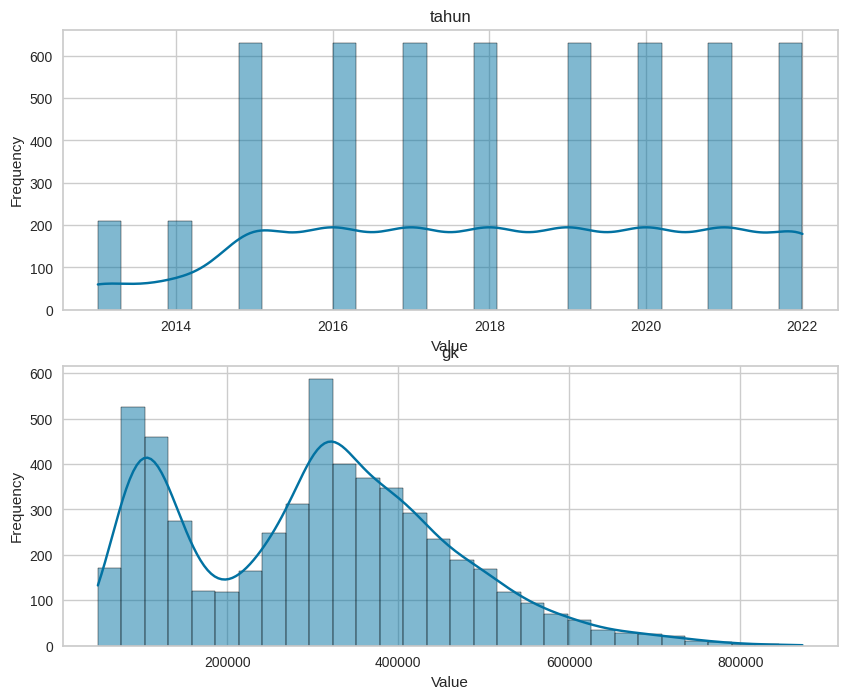

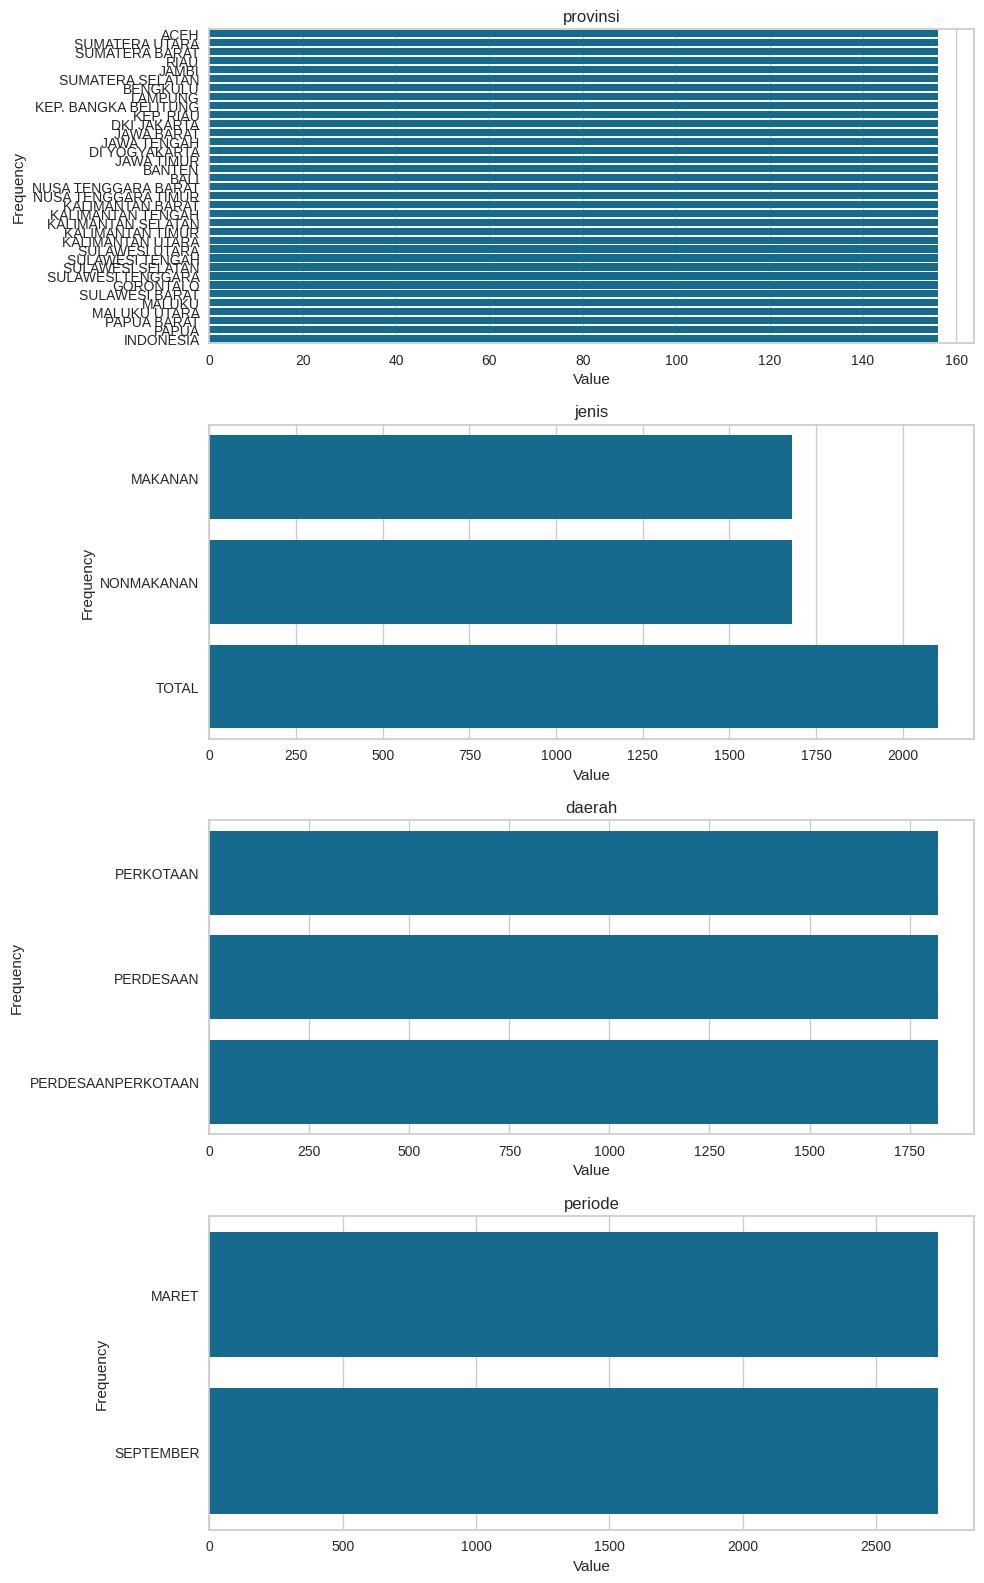

In [ ]:
fig, axes = plt.subplots(nrows=len(numeric_features), ncols=1, figsize=(10, len(numeric_features) * 4))

# Plot setiap variabel
for i, column in enumerate(numeric_features):
    sns.histplot(df[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Membuat subplot categorical
fig, axes = plt.subplots(nrows=len(cat_features), ncols=1, figsize=(10, len(cat_features) * 4))
# Plot setiap variabel
for i, column in enumerate(cat_features):
    sns.countplot(y=df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()
# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

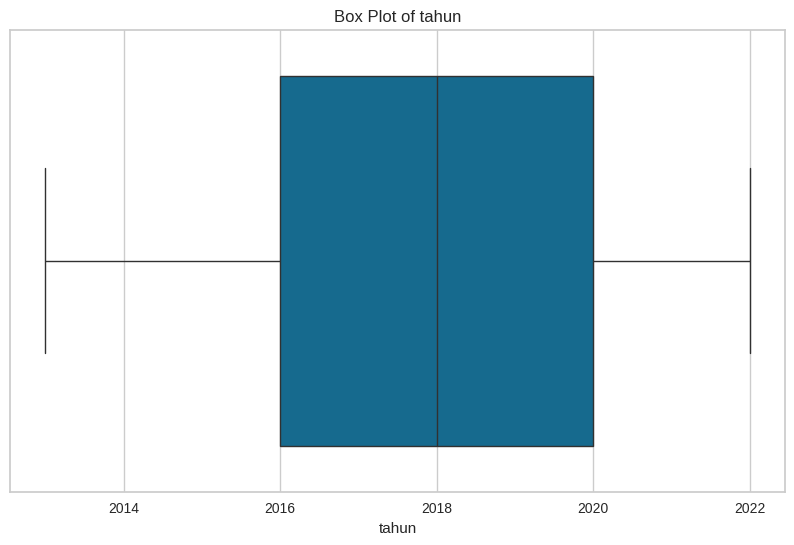

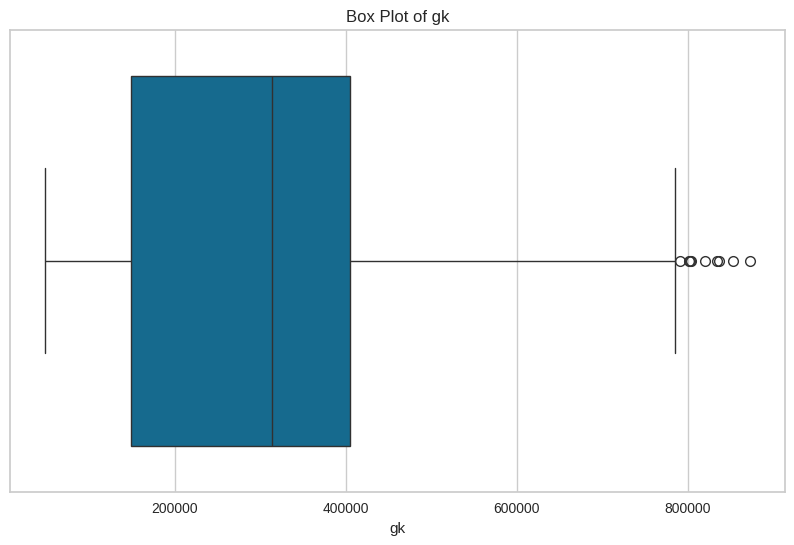

In [45]:
# Deteksi Outlier
# Visualisasi box plot untuk setiap fitur numerik
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

# Deteksi outlier menggunakan metode IQR (Interquartile Range)
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data yang berada dalam rentang normal
condition = ~((df[numeric_features] < lower_bound) | (df[numeric_features] > upper_bound)).any(axis=1)

# Membuat dataframe baru tanpa outlier
df_filtered_numeric = df.loc[condition, numeric_features]

# Menggabungkan kembali dengan data kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_cols]],axis=1)

In [ ]:
#normalisasi z-score
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print("\nData setelah normalisasi:")
print(df.head())


Data setelah normalisasi:
      tahun        gk provinsi    jenis     daerah    periode
0 -1.207697 -0.062952     ACEH  MAKANAN  PERKOTAAN      MARET
1 -1.207697 -0.008185     ACEH  MAKANAN  PERKOTAAN  SEPTEMBER
2 -0.819265  0.018546     ACEH  MAKANAN  PERKOTAAN      MARET
3 -0.819265  0.106404     ACEH  MAKANAN  PERKOTAAN  SEPTEMBER
4 -1.207697 -0.038385     ACEH  MAKANAN  PERDESAAN      MARET


In [ ]:
# Inisialisasi dictionary untuk menyimpan encoder
encoders = {}

# Label Encoding untuk kolom kategorikal
for col in categorical_cols:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    encoders[col] = label_encoder
    
df_normalized = df.copy()

In [48]:
for col in cat_features:
    unseen_labels = set(df_normalized[col]) - set(encoders[col].classes_)
    if unseen_labels:
        print(f"Kolom {col} memiliki label baru yang tidak dikenali encoder: {unseen_labels}")


Kolom provinsi memiliki label baru yang tidak dikenali encoder: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}
Kolom jenis memiliki label baru yang tidak dikenali encoder: {0, 1, 2}
Kolom daerah memiliki label baru yang tidak dikenali encoder: {0, 1, 2}
Kolom periode memiliki label baru yang tidak dikenali encoder: {0, 1}


In [49]:
print(df_normalized.dtypes)  # Cek tipe data setiap kolom
print(df_normalized.head()) # cek isi dataframe

tahun       float64
gk          float64
provinsi      int64
jenis         int64
daerah        int64
periode       int64
dtype: object
      tahun        gk  provinsi  jenis  daerah  periode
0 -1.207697 -0.062952         0      0       2        0
1 -1.207697 -0.008185         0      0       2        1
2 -0.819265  0.018546         0      0       2        0
3 -0.819265  0.106404         0      0       2        1
4 -1.207697 -0.038385         0      0       0        0


In [ ]:
#Binning
bins = sorted(df_normalized['tahun'].unique())
labels = [
    '2013-2014', '2014-2015', '2015-2016',
    '2016-2017', '2017-2018', '2018-2019',
    '2019-2020', '2020-2021', '2021-2022'
]

# Proses binning menggunakan pd.cut()
df_normalized['tahun_kategori'] = pd.cut(df_normalized['tahun'], bins=bins, labels=labels, right=False)

# Encoding kategori tahun
label_encoder_kategori = LabelEncoder()
df_normalized['tahun_kategori'] = label_encoder_kategori.fit_transform(
    df_normalized['tahun_kategori']
)

print("\nData setelah binning tahun:")
print(df_normalized)


Data setelah binning tahun:
         tahun        gk  provinsi  jenis  daerah  periode  tahun_kategori
0    -1.207697 -0.062952         0      0       2        0               2
1    -1.207697 -0.008185         0      0       2        1               2
2    -0.819265  0.018546         0      0       2        0               3
3    -0.819265  0.106404         0      0       2        1               3
4    -1.207697 -0.038385         0      0       0        0               2
...        ...       ...       ...    ...     ...      ...             ...
5455  1.511332  1.362740         7      2       0        1               9
5456  1.122899  1.098711         7      2       1        0               8
5457  1.122899  1.187335         7      2       1        1               8
5458  1.511332  1.312708         7      2       1        0               9
5459  1.511332  1.508100         7      2       1        1               9

[5451 rows x 7 columns]


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
X = df_normalized[['tahun', 'gk']].values

print(pd.DataFrame(X, columns=['tahun', 'gk']))

# Membangun model clustering dengan algoritma KMeans
kmeans_model = KMeans(n_clusters=3, random_state=0)
kmeans_model.fit(X)
labels = kmeans_model.labels_

         tahun        gk
0    -1.207697 -0.062952
1    -1.207697 -0.008185
2    -0.819265  0.018546
3    -0.819265  0.106404
4    -1.207697 -0.038385
...        ...       ...
5446  1.511332  1.362740
5447  1.122899  1.098711
5448  1.122899  1.187335
5449  1.511332  1.312708
5450  1.511332  1.508100

[5451 rows x 2 columns]


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

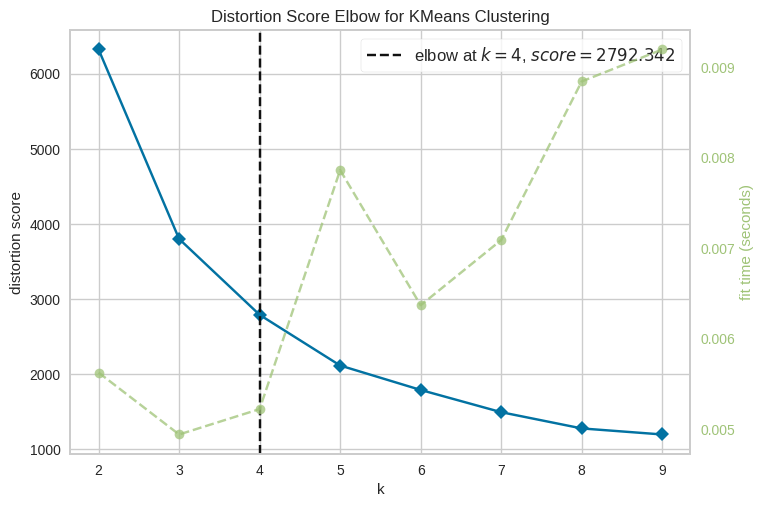

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
kmeans_elbow = KMeans(random_state=0)

# Membuat visualizer untuk Elbow Method
visualizer = KElbowVisualizer(kmeans_elbow, k=(2, 10))

# Melatih visualizer dengan data (X)
visualizer.fit(X)

# Mendapatkan nilai k optimal berdasarkan Elbow Method
optimal_k_elbow = visualizer.elbow_value_

# Menampilkan plot Elbow Method
visualizer.show()

Silhouette Score untuk k=2: 0.382
Silhouette Score untuk k=3: 0.431
Silhouette Score untuk k=4: 0.429
Silhouette Score untuk k=5: 0.423
Silhouette Score untuk k=6: 0.395
Silhouette Score untuk k=7: 0.403
Silhouette Score untuk k=8: 0.410
Silhouette Score untuk k=9: 0.401


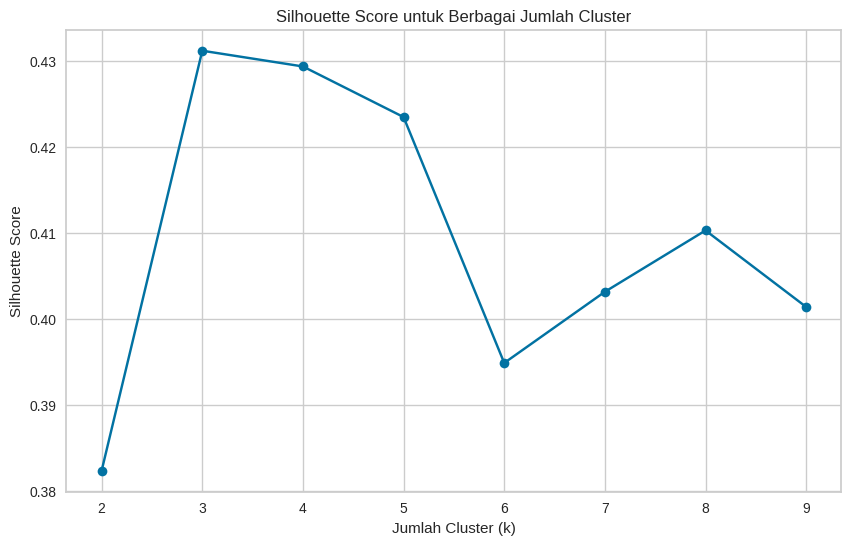

In [ ]:
# Inisialisasi list untuk menyimpan skor Silhouette
silhouette_scores = []

# Inisialisasi variabel untuk menyimpan skor Silhouette tertinggi
max_silhouette_score = -float('inf')

# Iterasi untuk mencoba jumlah cluster dari 2 hingga 9
for k in range(2, 10):
    kmeans_temp = KMeans(n_clusters=k, random_state=0)
    labels_temp = kmeans_temp.fit_predict(X)
    score = silhouette_score(X, labels_temp)
    silhouette_scores.append(score)
    print(f"Silhouette Score untuk k={k}: {score:.3f}")
    if score > max_silhouette_score:
        max_silhouette_score = score

# Visualisasi Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Menentukan jumlah cluster optimal berdasarkan Silhouette Score
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2

In [ ]:
print("\nRekomendasi Jumlah Cluster:")
print(f"Berdasarkan Elbow Method: {optimal_k_elbow} cluster")
print(f"Berdasarkan Silhouette Score: {optimal_k_silhouette} cluster")


Rekomendasi Jumlah Cluster:
Berdasarkan Elbow Method: 4 cluster
Berdasarkan Silhouette Score: 3 cluster


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [55]:
# Mengambil semua fitur dari dataset yang sudah dinormalisasi
features = df_normalized.columns

# Menyiapkan data untuk PCA
X_full = df_normalized[features].values

# Melakukan reduksi dimensi dengan PCA
pca = PCA(n_components=0.95, random_state=0)

X_pca = pca.fit_transform(X_full)

# Menampilkan jumlah fitur sebelum dan setelah PCA
print(f"\nJumlah fitur asli: {X_full.shape[1]}, setelah PCA: {X_pca.shape[1]}")


Jumlah fitur asli: 7, setelah PCA: 2


In [56]:
# Inisialisasi model KMeans dengan jumlah cluster optimal dari Elbow Method
kmeans_pca = KMeans(n_clusters=optimal_k_elbow, random_state=0 )

kmeans_pca.fit(X_pca)

# Melatih model dengan data hasil PCA
labels_pca = kmeans_pca.labels_

In [57]:
# Menghitung Silhouette Score untuk model dengan data hasil PCA
score_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score dengan feature selection (PCA): {score_pca:.3f}")

# Membandingkan dengan performa model asli (tanpa PCA)
score_original = max_silhouette_score  # Silhouette Score model asli
print(f"Silhouette Score model asli: {score_original:.3f}")

Silhouette Score dengan feature selection (PCA): 0.418
Silhouette Score model asli: 0.431


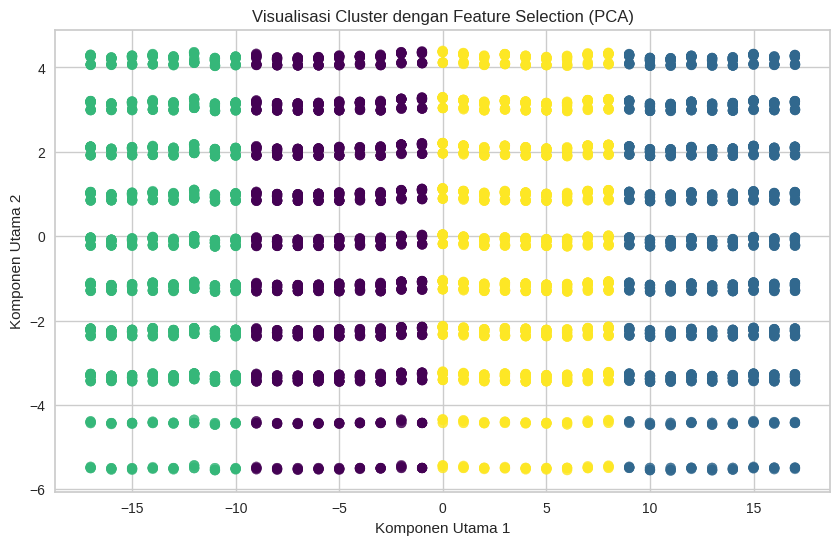

In [58]:
# Visualisasi hasil clustering menggunakan 2 komponen utama pertama dari PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', s=50, alpha=0.6)
plt.title('Visualisasi Cluster dengan Feature Selection (PCA)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

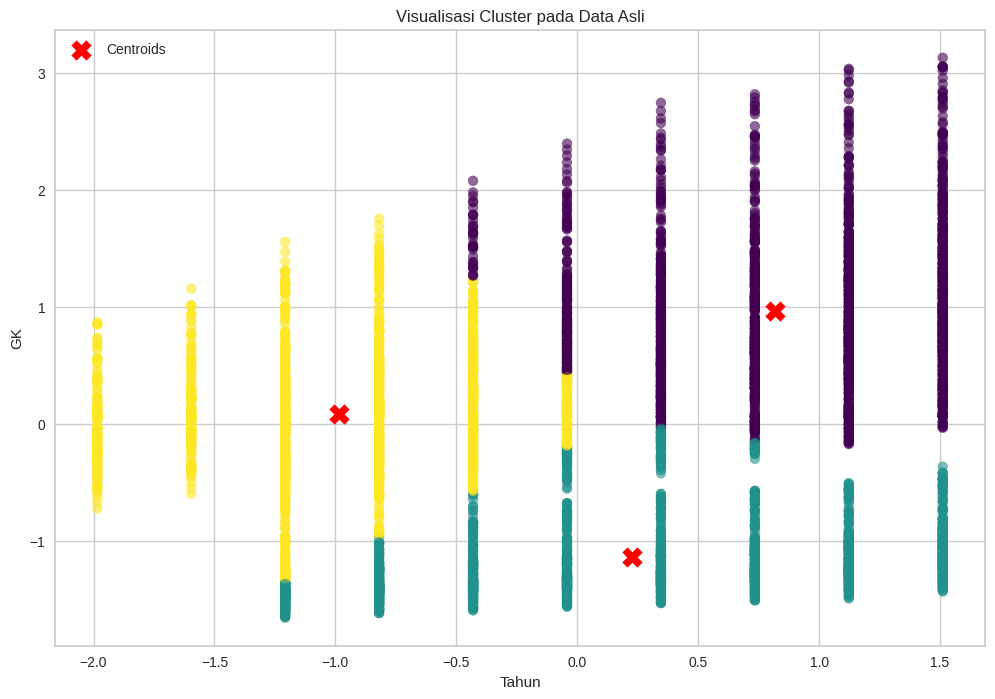

In [ ]:
plt.figure(figsize=(12, 8))

# Scatter plot untuk data asli dengan warna berdasarkan label cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)

# Menambahkan centroid ke dalam plot
centroids = kmeans_model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan judul dan label sumbu
plt.title('Visualisasi Cluster pada Data Asli')
plt.xlabel('Tahun')
plt.ylabel('GK')
plt.legend()
plt.show()

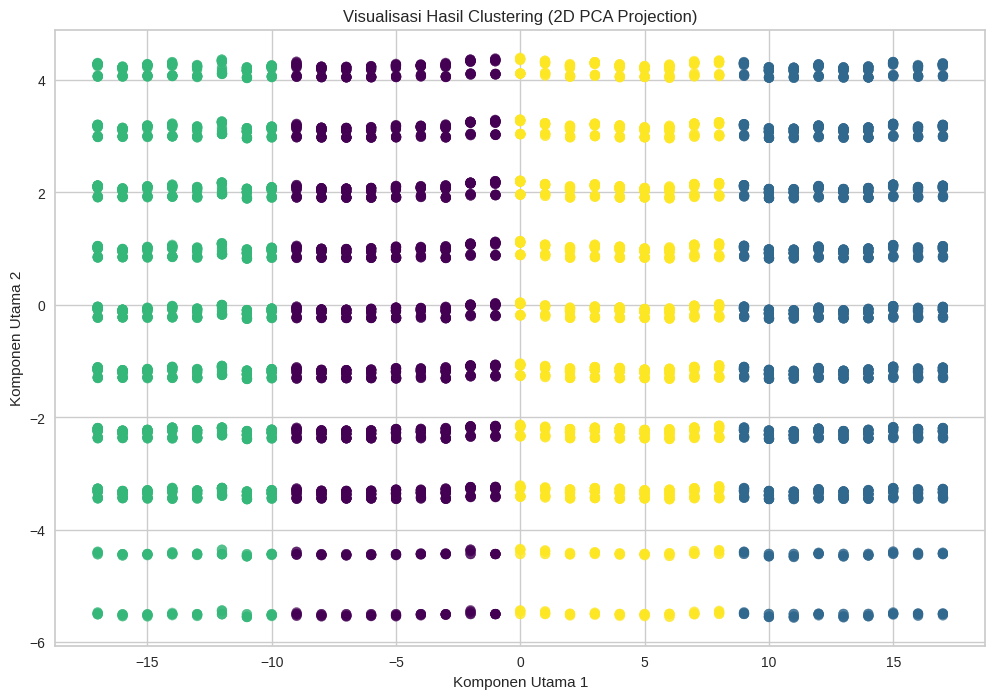

In [ ]:
# Visualisasi hasil clustering menggunakan 2 komponen utama pertama dari PCA
plt.figure(figsize=(12, 8))

# Scatter plot untuk data hasil PCA dengan warna berdasarkan label cluster
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', s=50, alpha=0.6)

# Menambahkan judul dan label sumbu
plt.title('Visualisasi Hasil Clustering (2D PCA Projection)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [61]:
df_normalized['cluster'] = kmeans_model.labels_

df_original = df_normalized.copy()

# Inverse transform untuk data numerik (misalnya, 'tahun' dan 'gk')
df_original[['tahun', 'gk']] = scaler.inverse_transform(df_normalized[['tahun', 'gk']])

for col in categorical_cols:
    df_original[col] = encoders[col].inverse_transform(df_normalized[col])

df_original['tahun_kategori'] = label_encoder_kategori.inverse_transform(df_normalized['tahun_kategori'])

print("Data asli setelah inverse transform:")
print(df_original.head())

Data asli setelah inverse transform:
    tahun        gk provinsi    jenis     daerah    periode tahun_kategori  \
0  2015.0  293697.0     ACEH  MAKANAN  PERKOTAAN      MARET      2015-2016   
1  2015.0  302128.0     ACEH  MAKANAN  PERKOTAAN  SEPTEMBER      2015-2016   
2  2016.0  306243.0     ACEH  MAKANAN  PERKOTAAN      MARET      2016-2017   
3  2016.0  319768.0     ACEH  MAKANAN  PERKOTAAN  SEPTEMBER      2016-2017   
4  2015.0  297479.0     ACEH  MAKANAN  PERDESAAN      MARET      2015-2016   

   cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [62]:
df_original[['tahun', 'gk']] = scaler.inverse_transform(df_normalized[['tahun', 'gk']])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
cluster_stats = df_original.groupby('cluster')[['tahun', 'gk']].agg(
    ['mean', 'median', 'std']
)

print("Statistik Deskriptif per Cluster:")
print(cluster_stats)

Statistik Deskriptif per Cluster:
               tahun                               gk                         
                mean  median       std           mean    median            std
cluster                                                                       
0        2020.212452  2020.0  1.373909  452364.991808  433925.0  103618.022146
1        2018.702290  2019.0  2.125065  128497.168526  113254.0   54183.188433
2        2015.573292  2016.0  1.437812  316461.643192  313294.0   77399.417887


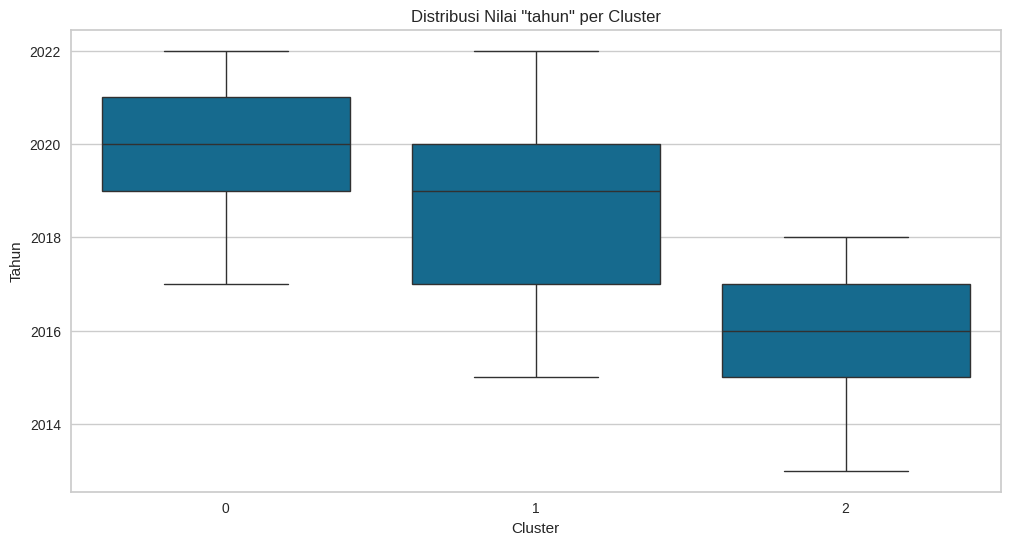

In [ ]:
# Membuat boxplot untuk melihat distribusi nilai 'tahun' di setiap cluster
plt.figure(figsize=(12, 6))
sns.boxplot( x='cluster', y='tahun', data=df_original)

plt.title('Distribusi Nilai "tahun" per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Tahun')
plt.show()

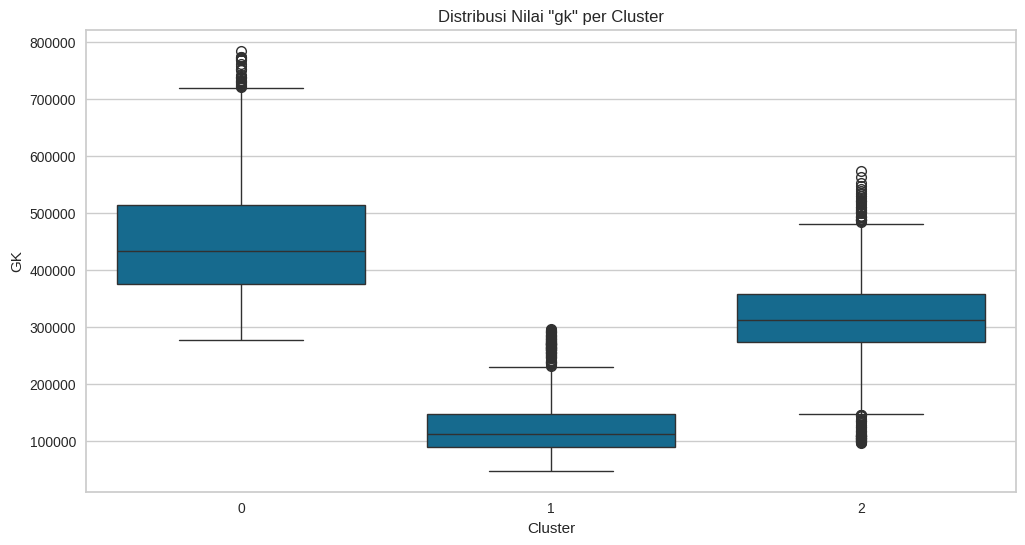

In [ ]:
# Membuat boxplot untuk melihat distribusi nilai 'gk' di setiap cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='gk', data=df_original)

plt.title('Distribusi Nilai "gk" per Cluster')
plt.xlabel('Cluster')
plt.ylabel('GK')
plt.show()

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata garis kemiskinan tahun 2020:** 452364.99
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata garis kemiskinan tahun 2018:** 128497.17
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata garis kemiskinan tahun 2015:** 316461.64
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [66]:
# Simpan DataFrame df_original ke file CSV tanpa menyertakan index
df_original.to_csv('Dataset_inisiasi.csv', index=False)
print("Data telah diekspor ke 'Dataset_inisiasi.csv'")

Data telah diekspor ke 'Dataset_inisiasi.csv'
